In [63]:
import pandas as pd

In [64]:
import numpy as np

In [65]:
import itertools

In [66]:
from statsmodels.tsa.ar_model import AutoReg

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
import warnings 

In [69]:
from statsmodels.tsa.arima_model import ARMA

In [70]:
import matplotlib.pyplot as plt

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [72]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [73]:
warnings.filterwarnings('ignore')

In [74]:
df1=pd.read_excel(r'C:\Users\LENOVO\Desktop\Monday.xlsx',parse_dates =[ 'DATE'],index_col = 'DATE')

In [75]:
df1

MON  Unnamed: 2  Unnamed: 3
DATE                                   
2012-11-26  1.0        49.0           3
NaT         1.0         NaN           7
NaT         2.0         NaN           9
2012-12-03  6.0        45.0           7
NaT         8.0         NaN           8
...         ...         ...         ...
NaT         6.0         NaN           6
NaT         7.0         NaN           6
2021-03-15  2.0        38.0           3
NaT         5.0         NaN           5
NaT         6.0         NaN           0

[1302 rows x 3 columns]

In [76]:
df1.rename(columns={'Unnamed: 2':'Result'},inplace=True)

In [77]:
index_names = df1[df1['Result'] == '**' ].index

In [78]:
df1.drop(index_names, inplace = True)

In [79]:
df1.head()

MON  Result  Unnamed: 3
DATE                               
2012-11-26  1.0    49.0           3
NaT         1.0     NaN           7
NaT         2.0     NaN           9
2012-12-03  6.0    45.0           7
NaT         8.0     NaN           8

In [80]:
df1.dropna(inplace=True)

In [81]:
df1

MON  Result  Unnamed: 3
DATE                               
2012-11-26  1.0    49.0           3
2012-12-03  6.0    45.0           7
2012-12-10  5.0    37.0           1
2012-12-17  1.0    91.0           2
2012-12-24  9.0    85.0           3
...         ...     ...         ...
2021-02-15  1.0    99.0           1
2021-02-22  1.0    68.0           4
2021-03-01  4.0     8.0           2
2021-03-08  3.0    66.0           4
2021-03-15  2.0    38.0           3

[433 rows x 3 columns]

In [82]:
mon=df1['Result']

In [83]:
mon

DATE
2012-11-26    49.0
2012-12-03    45.0
2012-12-10    37.0
2012-12-17    91.0
2012-12-24    85.0
              ... 
2021-02-15    99.0
2021-02-22    68.0
2021-03-01     8.0
2021-03-08    66.0
2021-03-15    38.0
Name: Result, Length: 433, dtype: float64

In [84]:
mon.shape

(433,)

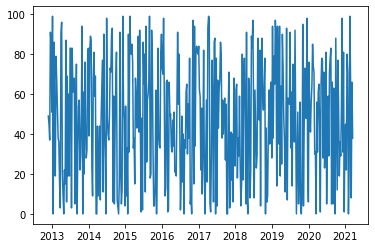

In [85]:
plt.plot(mon)

In [86]:
mon1=mon[0:400].astype(float)

# Decomposition

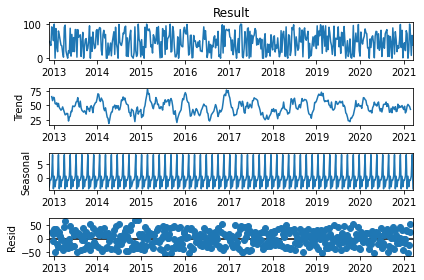

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt

result = seasonal_decompose(mon, model='additive', period = 7)
result.plot()
plt.show()

In [125]:
from pylab import rcParams
rcParams['figure.figsize']=40,8

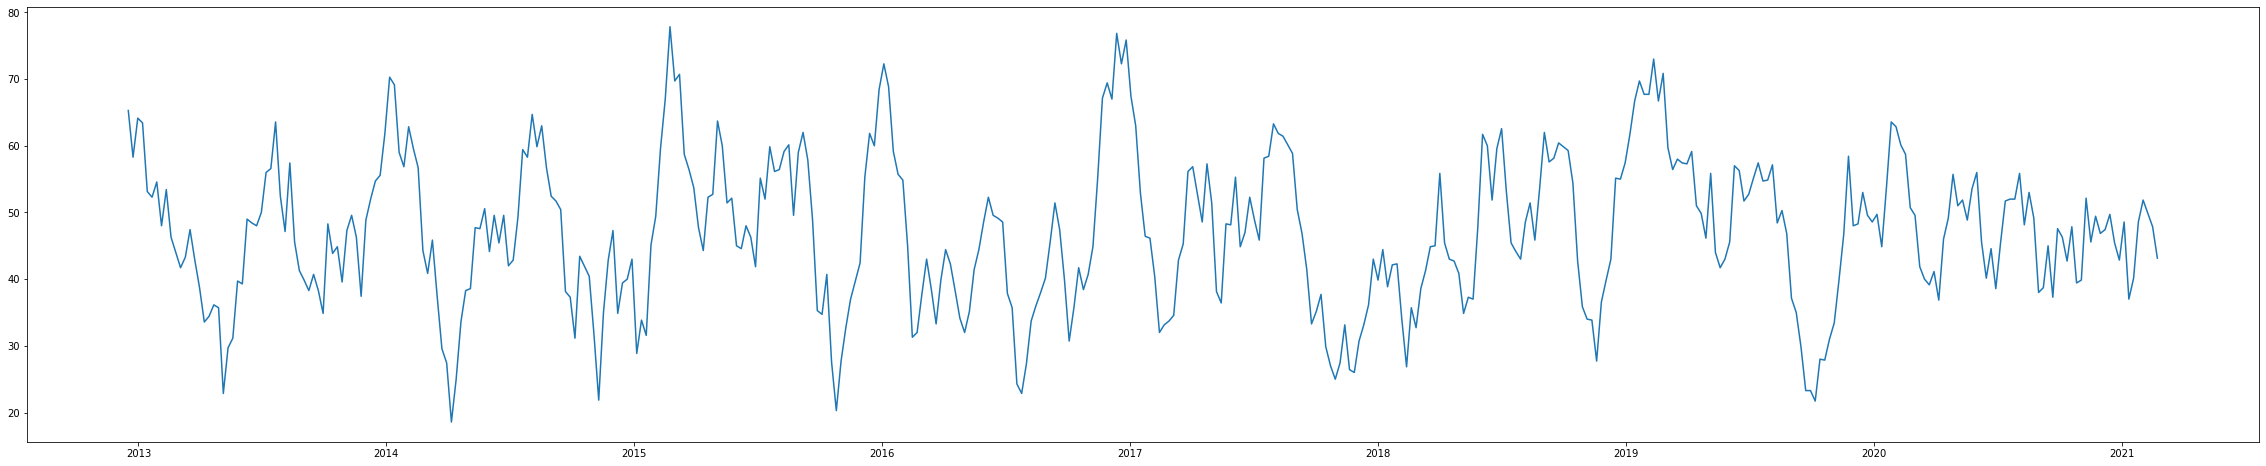

In [126]:
plt.plot(result.trend)
plt.show()

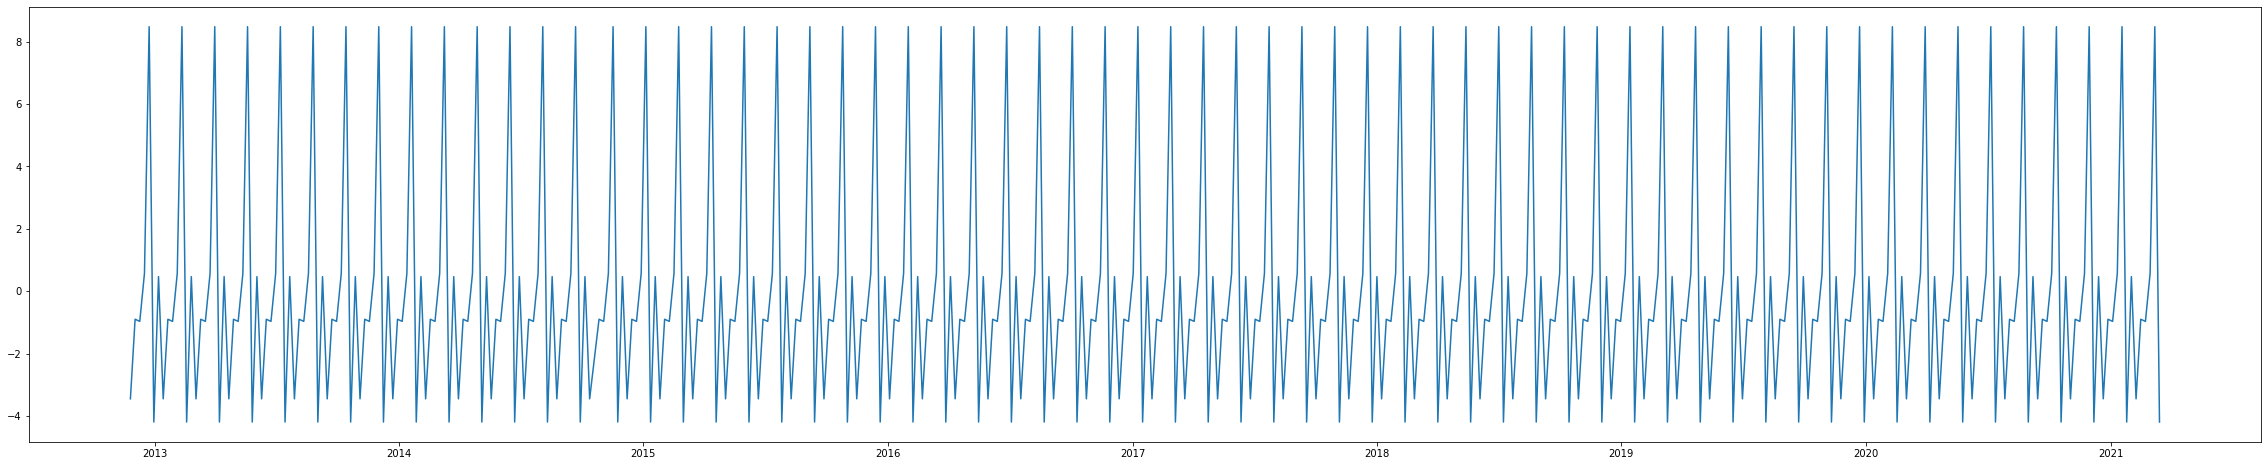

In [127]:
plt.plot(result.seasonal)
plt.show()

# AR Model

In [87]:
Armodel=AutoReg(mon1,lags=5)
Armodel_fit=Armodel.fit()

In [88]:
ypredict=Armodel_fit.predict(400,405)
print(ypredict)

400    47.794503
401    47.566561
402    45.756256
403    48.733431
404    46.510883
405    46.970865
dtype: float64


In [89]:
mon[400:405]

DATE
2020-08-03    78.0
2020-08-10    83.0
2020-08-17     5.0
2020-08-24    66.0
2020-08-31     5.0
Name: Result, dtype: float64

In [90]:
np.sqrt(mean_squared_error(mon[400:406],ypredict))

31.90400715592095

# Moving average 

In [91]:
MAmodel = ARMA(mon.astype(float), order=(0, 1)) #model with AR=0 and MA=1
MAmodel_fit = MAmodel.fit(disp=False)

In [92]:
mon[53:59]

DATE
2013-12-02    45.0
2013-12-09    28.0
2013-12-16    32.0
2013-12-23    80.0
2013-12-30    83.0
2014-01-06    39.0
Name: Result, dtype: float64

In [93]:
ypredicted = MAmodel_fit.predict(53,60)
print(ypredicted)

DATE
2013-12-02    46.649529
2013-12-09    47.128132
2013-12-16    47.405863
2013-12-23    47.346717
2013-12-30    46.583069
2014-01-06    46.523266
2014-01-13    47.221465
2014-01-20    46.549300
dtype: float64


In [94]:
np.sqrt(mean_squared_error(mon[53:59],ypredict))

22.182886831573516

# ARMA Model

In [95]:
ARMAmodel = ARMA(mon[0:200].astype(float), order=(1, 1))
ARmodel_fit = ARMAmodel.fit(disp=False)

In [96]:
ypredicted = ARmodel_fit.predict(len(mon[0:200]), len(mon[0:200])+2)
print(ypredicted)

200    46.305802
201    46.561509
202    46.564059
dtype: float64


In [97]:
mon[199:202]

DATE
2016-09-26    38.0
2016-10-03    78.0
2016-10-10     5.0
Name: Result, dtype: float64

In [98]:
mean_squared_error(mon[400:406],ypredict)

1017.8656726050552

# ARIMA MODEL

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
from statsmodels.tsa.arima_model import ARIMA

In [101]:
Arimamodel=ARIMA(mon[0:300].astype(float),order=(0,1,0))
arima_model_fit=Arimamodel.fit(disp=False)

In [102]:
ypredict=arima_model_fit.predict(len(mon[0:300]),len(mon[0:300])+2,typ='levels')
print(ypredict)

299    46.993311
300    46.986622
301    46.979933
dtype: float64


In [103]:
yforecast=arima_model_fit.forecast(steps=11)[0]

In [104]:
np.sqrt(mean_squared_error(mon[300:311],yforecast))

31.477838122468416

# Simple Exponential Smoothing

In [105]:
data=mon.astype(float)

In [106]:
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.01,optimized=False)

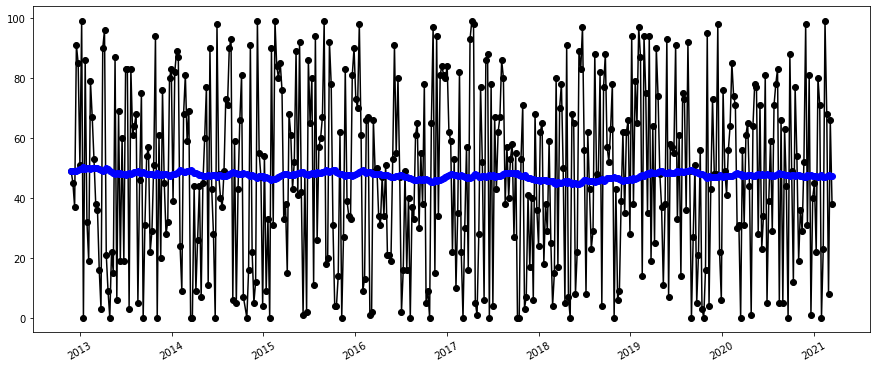

In [107]:
plt.figure(figsize=(15,6))

plt.plot(data,marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')

In [108]:
np.sqrt(mean_squared_error(mon,fit1.fittedvalues))

30.090523750833988

# Pmdarima Model

In [109]:
from statsmodels.tsa.stattools import adfuller

In [110]:
adfuller(mon)

(-21.04884220922264,
 0.0,
 0,
 432,
 {'1%': -3.445578199334947,
  '5%': -2.8682536932290876,
  '10%': -2.570346162765775},
 3993.2746173155447)

In [111]:
import pmdarima as pm

In [112]:
results = pm.auto_arima(mon, seasonal = True, m = 12, d = 1, D = 1, information_criterion = "bic", trace = True, error_action = "ignore", n_fits = 100, stepwise = True)


Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=inf, Time=2.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=4588.498, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=4414.482, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=inf, Time=0.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=4484.906, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : BIC=4361.742, Time=0.59 sec
 ARIMA(1,1,0)(2,1,1)[12]             : BIC=inf, Time=1.85 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : BIC=4470.881, Time=0.43 sec
 ARIMA(2,1,0)(2,1,0)[12]             : BIC=4307.827, Time=0.85 sec
 ARIMA(2,1,0)(1,1,0)[12]             : BIC=4354.960, Time=0.32 sec
 ARIMA(2,1,0)(2,1,1)[12]             : BIC=inf, Time=2.32 sec
 ARIMA(2,1,0)(1,1,1)[12]             : BIC=inf, Time=0.84 sec
 ARIMA(3,1,0)(2,1,0)[12]             : BIC=4286.407, Time=0.89 sec
 ARIMA(3,1,0)(1,1,0)[12]             : BIC=4335.6

In [113]:

from pmdarima.model_selection import train_test_split

In [114]:
train, test = train_test_split(mon, test_size =0.3)

In [115]:
prediction = pd.DataFrame(results.predict(n_periods = 130), test.index)


In [116]:
prediction

0
DATE                  
2018-09-24   47.831780
2018-10-01   41.600457
2018-10-08   55.181816
2018-10-15   72.283734
2018-10-22   71.174351
...                ...
2021-02-15   36.114279
2021-02-22   56.548989
2021-03-01   92.072792
2021-03-08  100.378767
2021-03-15   45.546144

[130 rows x 1 columns]

In [117]:
test

DATE
2018-09-24    88.0
2018-10-01    57.0
2018-10-08    52.0
2018-10-15    63.0
2018-10-22    78.0
              ... 
2021-02-15    99.0
2021-02-22    68.0
2021-03-01     8.0
2021-03-08    66.0
2021-03-15    38.0
Name: Result, Length: 130, dtype: float64

In [118]:
np.sqrt(mean_squared_error(prediction,test))

37.414082562841436

In [119]:
import statsmodels.api as sm

In [120]:
mod = sm.tsa.SARIMAX(Result.astype(float), order=(5,1,0),seasonal_order=(2,1,0,12))
res = mod.fit()
print(res.summary())

NameError: name 'Result' is not defined